In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
from matplotlib import pyplot as plt

# 1. Read data

In [2]:
fact_df = pd.read_excel('data DAE.xlsx', sheet_name='fact')
scheme_df = pd.read_excel('data DAE.xlsx', sheet_name='d_scheme')
voucher_df = pd.read_excel('data DAE.xlsx', sheet_name='d_voucher')
merchant_df = pd.read_excel('data DAE.xlsx', sheet_name='d_merchant')
user_df = pd.read_excel('data DAE.xlsx', sheet_name='d_user')

In [3]:
fact_df.columns = [x.lower() for x in fact_df.columns]
scheme_df.columns = [x.lower() for x in scheme_df.columns]
voucher_df.columns = [x.lower() for x in voucher_df.columns]
merchant_df.columns = [x.lower() for x in merchant_df.columns]
user_df.columns = [x.lower() for x in user_df.columns]

# 2. Data Profiling

**fact_df**

In [4]:
fact_df.head()

,transaction_id,serial_number,voucher_code,voucher_name,available_from,available_to,merchant_code,action,calendar_dim_id,user_id
0,1,2303368734,MA_HIGHLANDS_02012024_SF4410,"Giảm 39,000đ cho hóa đơn từ 139,000đ",2024-01-02T10:00,2024-01-31T23:59,HIGHLANDS,Claimed,2024-01-02T00:00,12fcb2
1,2,916736899628631,xXC3707,"Thẻ nạp Viettel 50,000đ",2020-09-14T14:35,2024-12-31T23:59,xXC,Redeemed,2024-02-02T00:00,c9877a
2,3,2283370694,MA_HIGHLANDS_02012024_SF4410,"Giảm 39,000đ cho hóa đơn từ 139,000đ",2024-01-02T10:00,2024-01-31T23:59,HIGHLANDS,Redeemed,2024-01-05T00:00,b1ebc3
3,5,2194823027,MA_HIGHLANDS_01022024_SF4602,"Giảm 39,000đ cho hóa đơn từ 149,000đ",2024-02-01T10:00,2024-02-29T23:59,HIGHLANDS,Claimed,2024-02-20T00:00,3e3bb8
4,6,VIN03IA6GQM,MA_BTASKEE_02062023_SF3423,Tặng 01 giờ Dịch vụ giúp việc tại nhà,2023-06-02T10:00,2024-02-29T23:59,DOSALESFORCE22049Rbo,Claimed,2024-02-10T00:00,a8ee0c


In [5]:
# cast calendar_dim_id, available_from, available_to into datetime type
fact_df['calendar_dim_id'] = pd.to_datetime(fact_df['calendar_dim_id'])
fact_df['available_from'] = pd.to_datetime(fact_df['available_from'])
fact_df['available_to'] = pd.to_datetime(fact_df['available_to'])

In [6]:
fact_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303943 entries, 0 to 303942
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   transaction_id   303943 non-null  int64         
 1   serial_number    303943 non-null  object        
 2   voucher_code     303943 non-null  object        
 3   voucher_name     303943 non-null  object        
 4   available_from   303943 non-null  datetime64[ns]
 5   available_to     303943 non-null  datetime64[ns]
 6   merchant_code    303943 non-null  object        
 7   action           303943 non-null  object        
 8   calendar_dim_id  303943 non-null  datetime64[ns]
 9   user_id          303943 non-null  object        
dtypes: datetime64[ns](3), int64(1), object(6)
memory usage: 23.2+ MB


**scheme_df**

In [7]:
scheme_df.head()

,discount_type,discount_amount,discount_percent,description,voucher_code
0,Cash Voucher,0,0,>đổi điểm vinid nhận ngay mã thẻ nạp tiền điện...,xXC3723
1,Buy 2 get 1,0,0,>voucher ưu đãi >khi mua 02 ly trà cỡ lớn (áp ...,MA_HIGHLANDS_01022024_SF4601
2,Free SKU,0,0,>voucher miễn phí combo cắt + hấp tóc trị giá ...,MA_YTOHAIRSALON_02062023_SF4718
3,Discount Fixed Amount (For Total Bill),300000,0,">voucher giảm 300,000đ cho hóa đơn 1,500,000đ ...",MAA_TORANO_24102023_SF4114
4,Discount Percentage (For SKU),0,5,>voucher ưu đãi giảm 5% cho đơn hàng bất kỳ kh...,MAA_VUANEM_01022024_SF4596


In [8]:
scheme_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   discount_type     315 non-null    object
 1   discount_amount   315 non-null    int64 
 2   discount_percent  315 non-null    int64 
 3   description       315 non-null    object
 4   voucher_code      315 non-null    object
dtypes: int64(2), object(3)
memory usage: 12.4+ KB


**voucher_df**

In [9]:
voucher_df.head()

,voucher_code,total_stock,display_date_from,display_date_to
0,MA_Hoayeuthuong_01032024_SF4672,400,2024-03-19 10:00:00,2024-04-30 23:59:00
1,MA_ROBINSTORE_19032024_SF4775,200,2024-03-29 10:00:00,2024-04-30 23:59:00
2,MAA_TUELAMBEAUTY_24012024_SF4562,500,2024-01-30 10:00:00,2024-03-31 23:59:00
3,MA_HIGHLANDS_01022024_SF4599,20000,2024-02-01 10:00:00,2024-02-29 23:59:00
4,MAP_CITiGYM_27062023_SF3464,9699,2023-06-27 10:00:00,2024-06-30 23:59:00


In [10]:
voucher_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   voucher_code       317 non-null    object        
 1   total_stock        317 non-null    int64         
 2   display_date_from  317 non-null    datetime64[ns]
 3   display_date_to    317 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 10.0+ KB


**merchant_df**

In [11]:
merchant_df.head()

,merchant_code,category,sub_category
0,DOSALESFORCE22049Rbo,Nhà cửa - Đời sống,Dịch vụ hỗ trợ gia đình
1,bt9,Nhà cửa - Đời sống,Hoa & Quà lưu niệm
2,DOSALESFORCE23199Um5,Ẩm thực,Đồ uống
3,GOLDENGATE,Ẩm thực,Nhà hàng - Quán ăn
4,HIGHLANDS,Ẩm thực,Đồ uống


In [12]:
merchant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   merchant_code  110 non-null    object
 1   category       108 non-null    object
 2   sub_category   103 non-null    object
dtypes: object(3)
memory usage: 2.7+ KB


In [13]:
merchant_df[merchant_df.category.isna()]

,merchant_code,category,sub_category
29,VinID,NaN,NaN
40,Innisfree,NaN,NaN


In [14]:
merchant_df[merchant_df.sub_category.isna()]

,merchant_code,category,sub_category
23,0316282840MISHI,Khác,NaN
29,VinID,NaN,NaN
40,Innisfree,NaN,NaN
57,xXC,Mẹ & bé,NaN
66,xXC,Thương mại điện tử,NaN
73,DOSALESFORCE24088ABs,Mẹ & bé,NaN
94,DOSALESFORCE24036I0u,Mẹ & bé,NaN


In [15]:
# gán giá trị cho merchant_code đang thiếu: 
#  + Innisfree: category là "Sức khỏe - Làm đẹp", sub_category là "Mỹ phẩm - Chăm sóc da, tóc"
#  + VinID: category là "Khác"
merchant_df.loc[(merchant_df.category.isna()) & (merchant_df.merchant_code == 'Innisfree'), 'sub_category'] = "Mỹ phẩm - Chăm sóc da, tóc"
merchant_df.loc[(merchant_df.category.isna()) & (merchant_df.merchant_code == 'Innisfree'), 'category'] = "Sức khỏe - Làm đẹp"
merchant_df.loc[(merchant_df.category.isna()) & (merchant_df.merchant_code == 'VinID'), 'category'] = 'Khác'

In [16]:
## check các merchant có nhiều giá trị
merchant_df['merchant_code'].value_counts().head(10)

merchant_code
xXC                     11
VUAHANGHIEU              3
0316282840MISHI          2
DOSALESFORCE23359nRU     2
DOSALESFORCE22152Jzp     2
DOSALESFORCE23221RiK     2
DOSALESFORCE22049Rbo     1
CTCPVINID                1
ESTEELAUDER              1
DOSALESFORCE23341rA2     1
Name: count, dtype: int64

**user_df**

In [17]:
user_df.head()

,gender,user_id,province_name,age
0,F,76843,Hà Nội,O55
1,NaN,13346d5,Miền Trung,25_34
2,NaN,132ed57,Hồ Chí Minh,UNIDENTIFIED
3,F,ac6216,Miền Bắc,U18
4,M,cb2f6f,HÀ NỘI,O55


In [18]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66717 entries, 0 to 66716
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         60469 non-null  object
 1   user_id        66717 non-null  object
 2   province_name  66717 non-null  object
 3   age            66717 non-null  object
dtypes: object(4)
memory usage: 2.0+ MB


In [19]:
user_df.gender.value_counts()

gender
F              38740
M              21706
unavailable       23
Name: count, dtype: int64

Giá trị thiếu ở cột gender này có thể điền bằng cách: 
 <ul>
     <li>tìm những dòng có cùng giá trị province_name và age, điền giá trị xuất hiện nhiều nhất</li>
     <li>điền bằng giá trị "unavailable"</li>
 </ul>

# 3. Data Preprocessing

## 3.1 Mapping category, subcategory for voucher

#### Đối với các merchant_code có nhiều giá trị: ["xXC", "VUAHANGHIEU", "0316282840MISHI", "DOSALESFORCE23359nRU", "DOSALESFORCE22152Jzp", "DOSALESFORCE23221RiK"], ta cần mapping lại giá trị category và sub_category một cách hợp lý

**"xXC"**:
    <ul>
        <li>Các VOUCHER_NAME có tên các nhà mạng như: ['viettel', 'vietnamobile', 'vinaphone', 'mobifone'] -> category: "Tiện ích - Nhà mạng", sub_category: "Viễn thông"</li>
        <li>Các VOUCHER_NAME có chứa các từ khoá như: ['thức uống', 'trà ', 'cà phê', 'đồ uống'] -> category: "Ẩm thực", sub_category: "Đồ uống"</li>
        <li>Các VOUCHER_NAME có chứa các từ khoá như: ['cơm ', 'buffet', 'lẩu', 'ẩm thực'] -> category: "Ẩm thực", sub_category: "Nhà hàng - Quán ăn"</li>
        <li>Các VOUCHER_NAME có chứa các từ khoá như: ['thời trang', 'quần áo'] -> category: "Thời trang và Phong cách sống	", sub_category: "Thời trang"</li>
        <li>Các VOUCHER_NAME có chứa các từ khoá như: ['mẹ và bé', 'em bé'] -> category: "Mẹ & bé", sub_category: np.nan</li>
        <li>Các VOUCHER_NAME có chứa các từ khoá như: ['mỹ phẩm', 'làm đẹp', 'dưỡng da'] -> category: "Sức khỏe - Làm đẹp", sub_category: "Mỹ phẩm - Chăm sóc da, tóc"</li>
        <li>Các VOUCHER_NAME có chứa các từ khoá như: ['mua hàng tiện lợi'] -> category: "Bán lẻ FMCG", sub_category: "Cửa hàng tiện lợi"</li>
        <li>Các VOUCHER_NAME có chứa các từ khoá như: ['mua sắm online'] -> category: "Thương mại điện tử", sub_category: "Thương mại điện tử"</li>
        <li>Các VOUCHER_NAME có chứa các từ khoá như: ['đặt món', 'đặt xe'] -> category: "Vận tải - Giao vận", sub_category: "Dịch vụ giao hàng" khi có từ "đặt món", "Ứng dụng gọi xe - Taxi" khi có từ "đặt xe"</li>
        <li>Còn lại phân vào category: "Bán lẻ FMCG", subcategory: "Siêu thị"</li>
    </ul>

**"VUAHANGHIEU"**:
    <ul>
        <li>Các VOUCHER_NAME có chứa các từ khoá như: ['thời trang'] -> category: "Thời trang và Phong cách sống", sub_category: "Thời trang"</li>
        <li>Các VOUCHER_NAME có chứa các từ khoá như: ['mỹ phẩm'] -> category: "Sức khỏe - Làm đẹp", sub_category: "Mỹ phẩm - Chăm sóc da, tóc"</li>
        <li>Còn lại phân vào category: "Thời trang và Phong cách sống", subcategory: "Trang sức - Phụ kiện"</li>
    </ul>

**"0316282840MISHI"**: Các VOUCHER_NAME này đều thuộc category: "Nhà cửa - Đời sống", sub_category: "Gia dụng"

**"DOSALESFORCE23359nRU"**:
    <ul>
        <li> Đang có 3 voucher_name: "Combo Vitamin C + Tinh dầu tỏi 490,000đ", "Siro cho bé - Mua 02 tính tiền 01", "Sữa bò non Top Life - Mua 02 tính tiền 01"</li> 
        <li> 3 voucher này đều liên quan đến category: "Sức khỏe - Làm đẹp", sub-category: "Thực phẩm chức năng - CSSK"</li>
    </ul>

**"DOSALESFORCE22152Jzp"**:
    <ul>
        <li>Các VOUCHER_NAME có chứa các từ khoá như: ['đặt xe', 'di chuyển', 'beBike', 'beCar'] -> category: "Vận tải - Giao vận", sub_category: "Ứng dụng gọi xe - Taxi"</li>
        <li>Các VOUCHER_NAME còn lại thuộc về sub_category: "Dịch vụ giao hàng"</li>
    </ul>

**"DOSALESFORCE23221RiK"**:
    <ul>
        <li>Các VOUCHER_NAME có chứa các từ khoá như: ['liệu trình', 'dịch vụ'] -> category: "Sức khỏe - Làm đẹp", sub_category: "Spa - Thẩm mỹ"</li>
        <li>Các VOUCHER_NAME khác thuộc về category: "Sức khỏe - Làm đẹp", sub_category: "Mỹ phẩm - Chăm sóc da, tóc"</li>
    </ul></ul>

In [20]:
# 4 merchant: ["xXC", "VUAHANGHIEU", "DOSALESFORCE22152Jzp", "DOSALESFORCE23221RiK"]
fact_df_1 = fact_df[fact_df['merchant_code'].isin(["xXC", "VUAHANGHIEU", "DOSALESFORCE22152Jzp", "DOSALESFORCE23221RiK"])]

In [21]:
mapping_category = {
    "xXC": {
        'viettel|vietnamobile|vinaphone|mobifone': ["Tiện ích - Nhà mạng", "Viễn thông"],
        'thức uống|trà |cà phê|đồ uống': ["Ẩm thực", "Đồ uống"],
        'cơm|buffet|lẩu|ẩm thực': ["Ẩm thực", "Nhà hàng - Quán ăn"],
        'thời trang|quần áo': ["Thời trang và Phong cách sống", "Thời trang"],
        'mẹ và bé|em bé': ["Mẹ & bé", np.nan],
        'mỹ phẩm|làm đẹp|dưỡng da': ["Sức khỏe - Làm đẹp", "Mỹ phẩm - Chăm sóc da, tóc"],
        'mua hàng tiện lợi': ["Bán lẻ FMCG", "Cửa hàng tiện lợi"],
        'mua sắm online': ["Thương mại điện tử", "Thương mại điện tử"],
        'đặt món': ["Vận tải - Giao vận", "Dịch vụ giao hàng"],
        'đặt xe': ["Vận tải - Giao vận", "Ứng dụng gọi xe - Taxi"]
    },
    "VUAHANGHIEU": {
        "thời trang": ["Thời trang và Phong cách sống", "Thời trang"],
        "mỹ phẩm": ["Sức khỏe - Làm đẹp", "Mỹ phẩm - Chăm sóc da, tóc"]
    },
    "DOSALESFORCE22152Jzp": {
        'đặt xe|di chuyển|beBike|beCar': ["Vận tải - Giao vận", "Ứng dụng gọi xe - Taxi"]
    },
    "DOSALESFORCE23221RiK": {
        'liệu trình|dịch vụ': ["Sức khỏe - Làm đẹp", "Spa - Thẩm mỹ"]
    }
}

In [22]:
def mapping_merchant_category(merchant_code, voucher_name):
    for key in mapping_category[merchant_code]:
        if len(re.findall(key, voucher_name)) > 0:
            return mapping_category[merchant_code][key]
    if merchant_code == "xXC":
        return ["Bán lẻ FMCG", "Siêu thị"]
    elif merchant_code == "VUAHANGHIEU":
        return ["Thời trang và Phong cách sống", "Trang sức - Phụ kiện"]
    elif merchant_code == "DOSALESFORCE22152Jzp":
        return ["Vận tải - Giao vận", "Dịch vụ giao hàng"]
    else:
        return ["Sức khỏe - Làm đẹp", "Mỹ phẩm - Chăm sóc da, tóc"]

In [23]:
fact_df_1['mapping'] = fact_df_1.apply(lambda row: mapping_merchant_category(row['merchant_code'], row['voucher_name'].lower()), axis=1)
fact_df_1['category'] = fact_df_1['mapping'].apply(lambda x: x[0])
fact_df_1['sub_category'] = fact_df_1['mapping'].apply(lambda x: x[1])
fact_df_1.drop('mapping', axis=1, inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_10772\3658700185.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fact_df_1['mapping'] = fact_df_1.apply(lambda row: mapping_merchant_category(row['merchant_code'], row['voucher_name'].lower()), axis=1)
C:\Users\Admin\AppData\Local\Temp\ipykernel_10772\3658700185.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fact_df_1['category'] = fact_df_1['mapping'].apply(lambda x: x[0])
C:\Users\Admin\AppData\Local\Temp\ipykernel_10772\3658700185.py:3: SettingWithCopy

In [24]:
fact_df_1.sub_category.unique()

array(['Viễn thông', 'Ứng dụng gọi xe - Taxi', 'Cửa hàng tiện lợi',
       'Dịch vụ giao hàng', 'Thời trang', 'Thương mại điện tử',
       'Spa - Thẩm mỹ', 'Đồ uống', 'Mỹ phẩm - Chăm sóc da, tóc',
       'Siêu thị', 'Trang sức - Phụ kiện', 'Nhà hàng - Quán ăn', nan],
      dtype=object)

In [25]:
# 2 merchant: ["0316282840MISHI", "DOSALESFORCE23359nRU"]
fact_df_2 = fact_df[fact_df['merchant_code'].isin(["0316282840MISHI", "DOSALESFORCE23359nRU"])]

In [26]:
fact_df_2['category'] = "Sức khỏe - Làm đẹp"
fact_df_2['sub_category'] = "Thực phẩm chức năng - CSSK"
fact_df_2.loc[fact_df['merchant_code'] == "0316282840MISHI", 'category'] = "Nhà cửa - Đời sống"
fact_df_2.loc[fact_df['merchant_code'] == "0316282840MISHI", 'sub_category'] = "Gia dụng"

C:\Users\Admin\AppData\Local\Temp\ipykernel_10772\4238107027.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fact_df_2['category'] = "Sức khỏe - Làm đẹp"
C:\Users\Admin\AppData\Local\Temp\ipykernel_10772\4238107027.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fact_df_2['sub_category'] = "Thực phẩm chức năng - CSSK"


#### Đối với các merchant_code có 1 giá trị, ta mapping 2 bảng fact_df và merchant_df

In [27]:
fact_df_3 = fact_df[~fact_df['merchant_code'].isin(["xXC", "VUAHANGHIEU", "0316282840MISHI", "DOSALESFORCE23359nRU", "DOSALESFORCE22152Jzp", "DOSALESFORCE23221RiK"])]

In [28]:
fact_df_3.shape

(223197, 10)

In [29]:
fact_df_3 = fact_df_3.merge(merchant_df, how='inner', on='merchant_code')

#### Nối các bảng lại với nhau

In [30]:
fact_df = pd.concat([pd.concat([fact_df_1, fact_df_2], ignore_index=True), fact_df_3], ignore_index=True)

## 3.2 Preprocessing data in dataframe user_df

In [31]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66717 entries, 0 to 66716
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         60469 non-null  object
 1   user_id        66717 non-null  object
 2   province_name  66717 non-null  object
 3   age            66717 non-null  object
dtypes: object(4)
memory usage: 2.0+ MB


#### normalize province_name

In [32]:
user_df['province_name'].value_counts()

province_name
HCM             6216
ĐN              6176
Hànoi           6166
HÀ NỘI          6085
Miền Trung      6044
UNIDENTIFIED    6041
Hồ Chí Minh     6033
Miền Bắc        6032
Hà Nội          6017
Đà Nẵng         5959
Miền Nam        5948
Name: count, dtype: int64

In [33]:
user_df['province_name'] = user_df['province_name'].replace({'HCM': 'Hồ Chí Minh', 'HÀ NỘI': 'Hà Nội', 'Hànoi': 'Hà Nội', 'ĐN': 'Đà Nẵng'})

In [34]:
user_df['province_name'].value_counts()

province_name
Hà Nội          18268
Hồ Chí Minh     12249
Đà Nẵng         12135
Miền Trung       6044
UNIDENTIFIED     6041
Miền Bắc         6032
Miền Nam         5948
Name: count, dtype: int64

#### mapping age into group

In [35]:
user_df['age'].value_counts()

age
45_54           7502
28              7497
25_34           7473
O55             7385
UNIDENTIFIED    7384
18_24           7380
U18             7330
35_44           7278
39               610
35               609
36               598
44               590
47               585
46               574
42               574
41               571
43               566
37               558
40               557
45               546
38               524
Hai Tư            26
Name: count, dtype: int64

In [36]:
user_df['age'].unique()

array(['O55', '25_34', 'UNIDENTIFIED', 'U18', '18_24', '35_44', '45_54',
       '28', 43, 46, 40, 35, 44, 38, 47, 45, 37, 41, 36, 39, 42, 'Hai Tư'],
      dtype=object)

In [37]:
def mapping_user_age_group(age):
    if age == 'Hai Tư':
        return '18_24'
    if age == '28':
        return '25_34'
    if type(age) == str:
        return age
    if age >= 55:
        return 'O55'
    elif age >= 45:
        return '45_54'
    elif age >= 35:
        return '35_44'
    elif age >= 25:
        return '25_34'
    elif age >= 18:
        return '18_24'
    else:
        return 'U18'

In [38]:
user_df['age'] = user_df['age'].apply(mapping_user_age_group)

#### filling missing values in gender

In [39]:
user_df['gender'].value_counts()

gender
F              38740
M              21706
unavailable       23
Name: count, dtype: int64

In [40]:
for province in user_df[user_df['gender'].isna()]['province_name'].unique():
    for age in user_df[user_df['gender'].isna()]['age'].unique():
        mode_value = user_df[(~user_df['gender'].isna()) & (user_df['province_name'] == province) & (user_df['age'] == age)]['gender'].mode()[0]
        number_of_missing = len(user_df[(user_df['gender'].isna()) & (user_df['province_name'] == province) & (user_df['age'] == age)])
        number_of_row = len(user_df[(user_df['province_name'] == province) & (user_df['age'] == age)])
        print(f'{province}, {age}: {mode_value}')
        print(f'number of missing values is {number_of_missing}')
        print(f'number of rows is {number_of_row}')
        print(f'missing percent: {round(number_of_missing*100 / number_of_row, 2)}')
        print('-'*50)

Miền Trung, 25_34: F
number of missing values is 124
number of rows is 1373
missing percent: 9.03
--------------------------------------------------
Miền Trung, UNIDENTIFIED: F
number of missing values is 63
number of rows is 646
missing percent: 9.75
--------------------------------------------------
Miền Trung, 18_24: F
number of missing values is 54
number of rows is 652
missing percent: 8.28
--------------------------------------------------
Miền Trung, O55: F
number of missing values is 66
number of rows is 662
missing percent: 9.97
--------------------------------------------------
Miền Trung, 45_54: F
number of missing values is 91
number of rows is 888
missing percent: 10.25
--------------------------------------------------
Miền Trung, U18: F
number of missing values is 60
number of rows is 647
missing percent: 9.27
--------------------------------------------------
Miền Trung, 35_44: F
number of missing values is 92
number of rows is 1176
missing percent: 7.82
---------------

Tỉ lệ giá trị thiếu chúng ta thấy khoảng 10% ở các tỉnh thành + nhóm tuổi, nếu điền bằng giá trị xuất hiện nhiều nhất là 'F' sẽ khiến giá trị lệch khá nhiều. Do đó sẽ lựa chọn việc điền giá trị thiếu là "unavailable"

In [41]:
user_df['gender'] = user_df['gender'].fillna('unavailable')

In [42]:
fact_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303943 entries, 0 to 303942
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   transaction_id   303943 non-null  int64         
 1   serial_number    303943 non-null  object        
 2   voucher_code     303943 non-null  object        
 3   voucher_name     303943 non-null  object        
 4   available_from   303943 non-null  datetime64[ns]
 5   available_to     303943 non-null  datetime64[ns]
 6   merchant_code    303943 non-null  object        
 7   action           303943 non-null  object        
 8   calendar_dim_id  303943 non-null  datetime64[ns]
 9   user_id          303943 non-null  object        
 10  category         303943 non-null  object        
 11  sub_category     303804 non-null  object        
dtypes: datetime64[ns](3), int64(1), object(8)
memory usage: 27.8+ MB


## 3.3 Check if fact_df([available_from, available_to]) in time range voucher_df(['display_date_from', 'display_date_to']) 

In [43]:
mapping_table = fact_df.merge(voucher_df, how='inner', on='voucher_code')

In [44]:
mapping_table['display_start_date'] = mapping_table['display_date_from'].dt.date
mapping_table['display_end_date'] = mapping_table['display_date_to'].dt.date
mapping_table['created_date'] = mapping_table['calendar_dim_id'].dt.date

In [45]:
mapping_table.head(5)

,transaction_id,serial_number,voucher_code,voucher_name,available_from,available_to,merchant_code,action,calendar_dim_id,user_id,category,sub_category,total_stock,display_date_from,display_date_to,display_start_date,display_end_date,created_date
0,2,916736899628631,xXC3707,"Thẻ nạp Viettel 50,000đ",2020-09-14 14:35:00,2024-12-31 23:59:00,xXC,Redeemed,2024-02-02,c9877a,Tiện ích - Nhà mạng,Viễn thông,199324,2020-09-14 14:35:00,2024-12-31 23:59:00,2020-09-14,2024-12-31,2024-02-02
1,11,114049459444617,xXC3707,"Thẻ nạp Viettel 50,000đ",2020-09-14 14:35:00,2024-12-31 23:59:00,xXC,Claimed,2024-01-01,a62637,Tiện ích - Nhà mạng,Viễn thông,199324,2020-09-14 14:35:00,2024-12-31 23:59:00,2020-09-14,2024-12-31,2024-01-01
2,27,612259749544107,xXC3707,"Thẻ nạp Viettel 50,000đ",2020-09-14 14:35:00,2024-12-31 23:59:00,xXC,Redeemed,2024-02-07,7bc692,Tiện ích - Nhà mạng,Viễn thông,199324,2020-09-14 14:35:00,2024-12-31 23:59:00,2020-09-14,2024-12-31,2024-02-07
3,28,918073016644887,xXC3707,"Thẻ nạp Viettel 50,000đ",2020-09-14 14:35:00,2024-12-31 23:59:00,xXC,Redeemed,2024-01-29,a0cc0a,Tiện ích - Nhà mạng,Viễn thông,199324,2020-09-14 14:35:00,2024-12-31 23:59:00,2020-09-14,2024-12-31,2024-01-29
4,44,16173309617484,xXC3707,"Thẻ nạp Viettel 50,000đ",2020-09-14 14:35:00,2024-12-31 23:59:00,xXC,Claimed,2024-01-08,e066d,Tiện ích - Nhà mạng,Viễn thông,199324,2020-09-14 14:35:00,2024-12-31 23:59:00,2020-09-14,2024-12-31,2024-01-08


In [46]:
# check if created_date < display_start_date => remove these rows
mapping_table[mapping_table['created_date'] < mapping_table['display_start_date']]

,transaction_id,serial_number,voucher_code,voucher_name,available_from,available_to,merchant_code,action,calendar_dim_id,user_id,category,sub_category,total_stock,display_date_from,display_date_to,display_start_date,display_end_date,created_date


In [47]:
# check if create_at > display_end_date => remove these rows
mapping_table[mapping_table['created_date'] > mapping_table['display_end_date']]

,transaction_id,serial_number,voucher_code,voucher_name,available_from,available_to,merchant_code,action,calendar_dim_id,user_id,category,sub_category,total_stock,display_date_from,display_date_to,display_start_date,display_end_date,created_date
298178,2614,CMVNIDV2W30Q,MAA_COOLMATE_01122023_SF4248,"Tặng 01 áo thun trị giá 199,000đ",2023-12-01 10:00:00,2024-01-02 23:59:00,DOSALESFORCE22049Ykn,Claimed,2024-01-03,599966,Thời trang và Phong cách sống,Thời trang,1000,2023-12-01 10:00:00,2024-01-02 23:59:00,2023-12-01,2024-01-02,2024-01-03
298198,40663,CMVNIDV2TUHP,MAA_COOLMATE_01122023_SF4248,"Tặng 01 áo thun trị giá 199,000đ",2023-12-01 10:00:00,2024-01-02 23:59:00,DOSALESFORCE22049Ykn,Redeemed,2024-01-03,160c3e,Thời trang và Phong cách sống,Thời trang,1000,2023-12-01 10:00:00,2024-01-02 23:59:00,2023-12-01,2024-01-02,2024-01-03
298215,66838,CMVNIDV2RYEE,MAA_COOLMATE_01122023_SF4248,"Tặng 01 áo thun trị giá 199,000đ",2023-12-01 10:00:00,2024-01-02 23:59:00,DOSALESFORCE22049Ykn,Claimed,2024-01-03,4e2e91,Thời trang và Phong cách sống,Thời trang,1000,2023-12-01 10:00:00,2024-01-02 23:59:00,2023-12-01,2024-01-02,2024-01-03
298217,73029,CMVNIDV26SHH,MAA_COOLMATE_01122023_SF4248,"Tặng 01 áo thun trị giá 199,000đ",2023-12-01 10:00:00,2024-01-02 23:59:00,DOSALESFORCE22049Ykn,Claimed,2024-01-03,bf5ca,Thời trang và Phong cách sống,Thời trang,1000,2023-12-01 10:00:00,2024-01-02 23:59:00,2023-12-01,2024-01-02,2024-01-03
298228,95069,CMVNIDV26SHH,MAA_COOLMATE_01122023_SF4248,"Tặng 01 áo thun trị giá 199,000đ",2023-12-01 10:00:00,2024-01-02 23:59:00,DOSALESFORCE22049Ykn,Redeemed,2024-01-03,bf5ca,Thời trang và Phong cách sống,Thời trang,1000,2023-12-01 10:00:00,2024-01-02 23:59:00,2023-12-01,2024-01-02,2024-01-03
298229,95993,CMVNIDV2S8UZ,MAA_COOLMATE_01122023_SF4248,"Tặng 01 áo thun trị giá 199,000đ",2023-12-01 10:00:00,2024-01-02 23:59:00,DOSALESFORCE22049Ykn,Claimed,2024-01-03,17159,Thời trang và Phong cách sống,Thời trang,1000,2023-12-01 10:00:00,2024-01-02 23:59:00,2023-12-01,2024-01-02,2024-01-03
298243,120106,CMVNIDV2XPB9,MAA_COOLMATE_01122023_SF4248,"Tặng 01 áo thun trị giá 199,000đ",2023-12-01 10:00:00,2024-01-02 23:59:00,DOSALESFORCE22049Ykn,Claimed,2024-01-03,131f445,Thời trang và Phong cách sống,Thời trang,1000,2023-12-01 10:00:00,2024-01-02 23:59:00,2023-12-01,2024-01-02,2024-01-03
298248,127631,CMVNIDV27P45,MAA_COOLMATE_01122023_SF4248,"Tặng 01 áo thun trị giá 199,000đ",2023-12-01 10:00:00,2024-01-02 23:59:00,DOSALESFORCE22049Ykn,Claimed,2024-01-03,7c7aa2,Thời trang và Phong cách sống,Thời trang,1000,2023-12-01 10:00:00,2024-01-02 23:59:00,2023-12-01,2024-01-02,2024-01-03
298261,141370,CMVNIDV21UYP,MAA_COOLMATE_01122023_SF4248,"Tặng 01 áo thun trị giá 199,000đ",2023-12-01 10:00:00,2024-01-02 23:59:00,DOSALESFORCE22049Ykn,Claimed,2024-01-03,72512a,Thời trang và Phong cách sống,Thời trang,1000,2023-12-01 10:00:00,2024-01-02 23:59:00,2023-12-01,2024-01-02,2024-01-03
298283,174533,CMVNIDV29227,MAA_COOLMATE_01122023_SF4248,"Tặng 01 áo thun trị giá 199,000đ",2023-12-01 10:00:00,2024-01-02 23:59:00,DOSALESFORCE22049Ykn,Claimed,2024-01-03,46eb27,Thời trang và Phong cách sống,Thời trang,1000,2023-12-01 10:00:00,2024-01-02 23:59:00,2023-12-01,2024-01-02,2024-01-03


In [48]:
# check if available_to > display_date_to
mapping_table[mapping_table['available_to'] > mapping_table['display_date_to']]

,transaction_id,serial_number,voucher_code,voucher_name,available_from,available_to,merchant_code,action,calendar_dim_id,user_id,category,sub_category,total_stock,display_date_from,display_date_to,display_start_date,display_end_date,created_date


In [49]:
# check if available_from < display_date_from
mapping_table[mapping_table['available_from'] < mapping_table['display_date_from']]

,transaction_id,serial_number,voucher_code,voucher_name,available_from,available_to,merchant_code,action,calendar_dim_id,user_id,category,sub_category,total_stock,display_date_from,display_date_to,display_start_date,display_end_date,created_date


In [50]:
mapping_table = mapping_table[~mapping_table['transaction_id'].isin(mapping_table[mapping_table['created_date'] > mapping_table['display_end_date']]['transaction_id'].values)]

In [51]:
mapping_table.columns

Index(['transaction_id', 'serial_number', 'voucher_code', 'voucher_name',
       'available_from', 'available_to', 'merchant_code', 'action',
       'calendar_dim_id', 'user_id', 'category', 'sub_category', 'total_stock',
       'display_date_from', 'display_date_to', 'display_start_date',
       'display_end_date', 'created_date'],
      dtype='object')

In [52]:
mapping_table['available_range'] = (mapping_table['available_to'] - mapping_table['available_from']).dt.days + 1
mapping_table['display_range'] = (mapping_table['available_to'] - mapping_table['available_from']).dt.days + 1
mapping_table['created_dow'] = mapping_table['calendar_dim_id'].dt.dayofweek

In [53]:
# check if number of claim > total stock
checking = mapping_table.groupby(['voucher_code', 'total_stock', 'action'], as_index=False).size()

In [54]:
checking[checking['size'] > checking['total_stock']]

,voucher_code,total_stock,action,size
118,MAA_TORANO_24102023_SF4102,200,Claimed,412
120,MAA_TORANO_24102023_SF4112,200,Claimed,212


In [55]:
# remove 3 columns ['display_start_date', 'display_end_date', 'created_date']
mapping_table.drop(['display_start_date', 'display_end_date', 'created_date'], axis=1, inplace=True)

In [56]:
mapping_table.columns

Index(['transaction_id', 'serial_number', 'voucher_code', 'voucher_name',
       'available_from', 'available_to', 'merchant_code', 'action',
       'calendar_dim_id', 'user_id', 'category', 'sub_category', 'total_stock',
       'display_date_from', 'display_date_to', 'available_range',
       'display_range', 'created_dow'],
      dtype='object')

## 3.4 Preprocessing data in dataframe scheme_df

In [57]:
# text processing function to extract discount value in voucher description
def get_discount_amount(type, description):
    if type not in ['Free SKU', 'Cash Voucher']:
        return 0
    amount = re.findall(r'\d{1,3}(?:,\d{3})+đ', description)
    if len(amount) > 0:
        return int(amount[0].replace(',', '').replace('đ', ''))
    return 0

def get_discount_percent(type, description):
    if type not in ['Free SKU', 'Cash Voucher']:
        return 0
    percent = re.findall(r'\d+%', description)
    if len(percent) > 0:
        return int(percent[0].replace('%', ''))
    return 0

In [58]:
scheme_df.columns

Index(['discount_type', 'discount_amount', 'discount_percent', 'description',
       'voucher_code'],
      dtype='object')

In [59]:
scheme_df['discount_amount_tmp'] = scheme_df.apply(lambda row: get_discount_amount(row['discount_type'], row['description']) 
                                                   if row['discount_amount'] + row['discount_percent'] == 0 else 0, axis=1)
scheme_df['discount_percent_tmp'] = scheme_df.apply(lambda row: get_discount_percent(row['discount_type'], row['description']) 
                                                    if row['discount_amount'] + row['discount_percent'] == 0 else 0, axis=1)
scheme_df['discount_amount'] = scheme_df.apply(lambda row: max(row['discount_amount'], row['discount_amount_tmp']), axis=1)
scheme_df['discount_percent'] = scheme_df.apply(lambda row: max(row['discount_percent'], row['discount_percent_tmp']), axis=1)

In [60]:
scheme_df.drop(['discount_amount_tmp', 'discount_percent_tmp'], axis=1, inplace=True)

In [61]:
for i in range(len(scheme_df)):
    if scheme_df.loc[i, 'discount_amount'] + scheme_df.loc[i, 'discount_percent'] == 0:
        print(scheme_df.loc[i, 'discount_type'])
        print(scheme_df.loc[i, 'description'])
        print('-'*100)

Buy 2 get 1
>voucher ưu đãi >khi mua 02 ly trà cỡ lớn (áp dùng tất cả dòng trà), khách hàng được tặng thêm 01 ly
----------------------------------------------------------------------------------------------------
Cash Voucher
>đổi 50,000 điểm vinid nhận ngay 1,500 dặm >thưởng lotusmiles> (dặm bay >vietnam airlines)>.
----------------------------------------------------------------------------------------------------
Buy 2 get 1
>voucher ưu đãi >khi mua 02 ly trà hoặc freeze cỡ lớn hoặc vừa (cùng dòng), khách hàng được tặng thê
----------------------------------------------------------------------------------------------------
Combo Bundle
>ưu đãi combo 01 lọ >viên nhai vitamin c >springleaf >500mg> + 01 lọ >tinh dầu tỏi> giá chỉ 490,000đ
----------------------------------------------------------------------------------------------------
Cash Voucher
>đổi điểm vinid nhận ngay điểm thưởng bamboo club, điểm sẽ được gửi trực tiếp vào tài khoản bav mà k
------------------------------------

## 3.5. Export mapping_table (already involve 3 tables: fact_df, voucher_df, merchant_df), scheme_df, user_df

In [62]:
scheme_df.to_csv('scheme_df.csv', index=False)
user_df.to_csv('user_df.csv', index=False)

In [63]:
mapping_table = mapping_table.merge(scheme_df, how='left', on='voucher_code')
mapping_table.to_csv('fact_df.csv', index=False)

In [64]:
mapping_table.columns

Index(['transaction_id', 'serial_number', 'voucher_code', 'voucher_name',
       'available_from', 'available_to', 'merchant_code', 'action',
       'calendar_dim_id', 'user_id', 'category', 'sub_category', 'total_stock',
       'display_date_from', 'display_date_to', 'available_range',
       'display_range', 'created_dow', 'discount_type', 'discount_amount',
       'discount_percent', 'description'],
      dtype='object')

# 4. EDA

### 4.1 mapping_table

**Xét theo category**

In [65]:
# get top5_category
top5_category = mapping_table.category.value_counts().reset_index()['category'].values[:5]
top5_category

array(['Ẩm thực', 'Tiện ích - Nhà mạng', 'Thời trang và Phong cách sống',
       'Vận tải - Giao vận', 'Nhà cửa - Đời sống'], dtype=object)

<li>Phân phối của discount amount theo category</li>

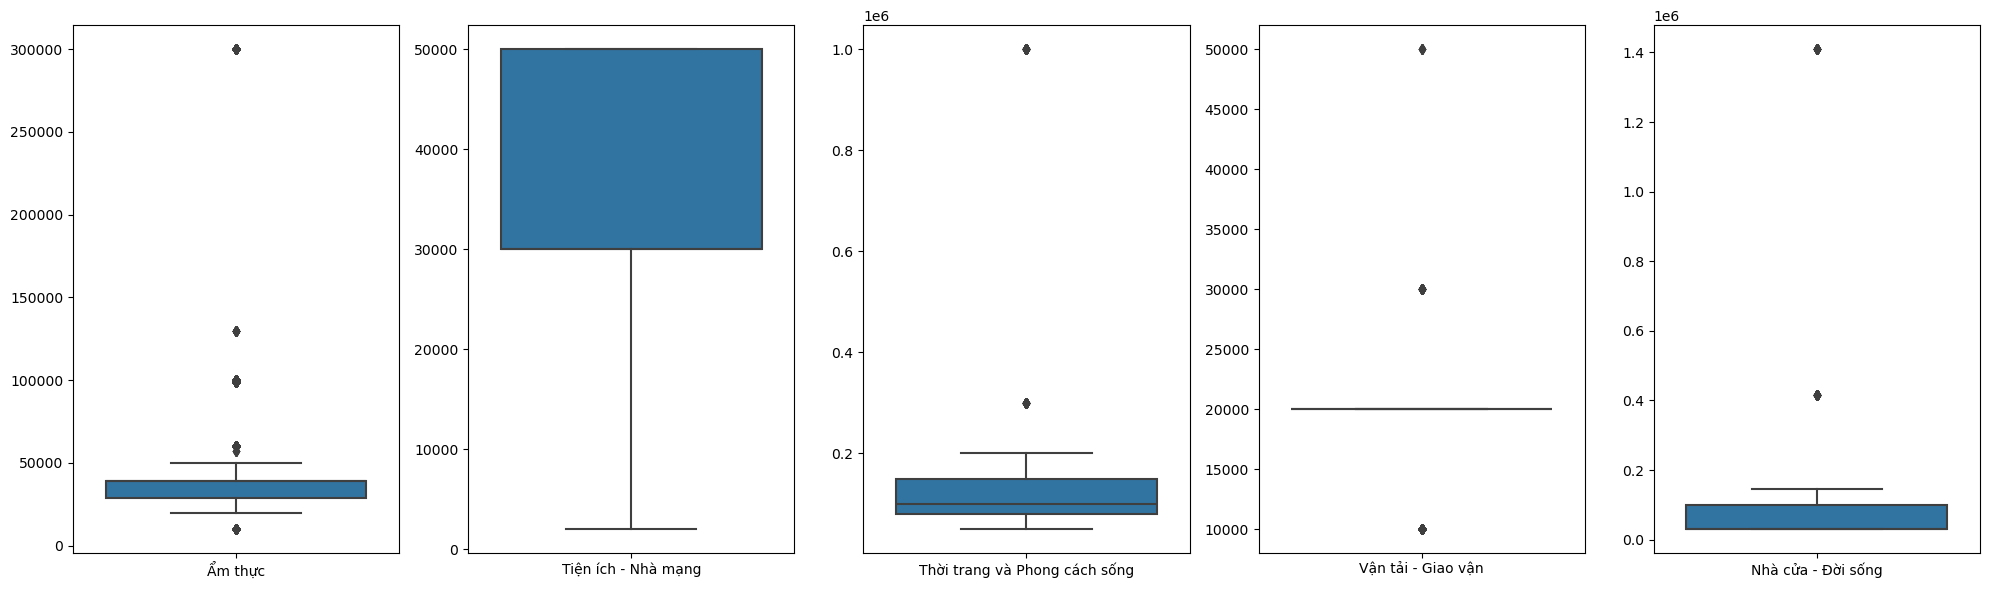

In [91]:
# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 6))

# Iterate over top 5 categories
for i, cate in enumerate(top5_category):
    tmp = mapping_table[mapping_table['category'] == cate]
    
    # Filter out rows where discount_amount > 0
    tmp_filtered = tmp[tmp['discount_amount'] > 0]

    # Create a boxplot on the i-th subplot
    sns.boxplot(x='category', y='discount_amount' , data=tmp_filtered, ax=axes[i])
    
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    
# Adjust layout and display the plot
plt.tight_layout()
plt.show()

<li>Phân phối của discount percent theo category</li>

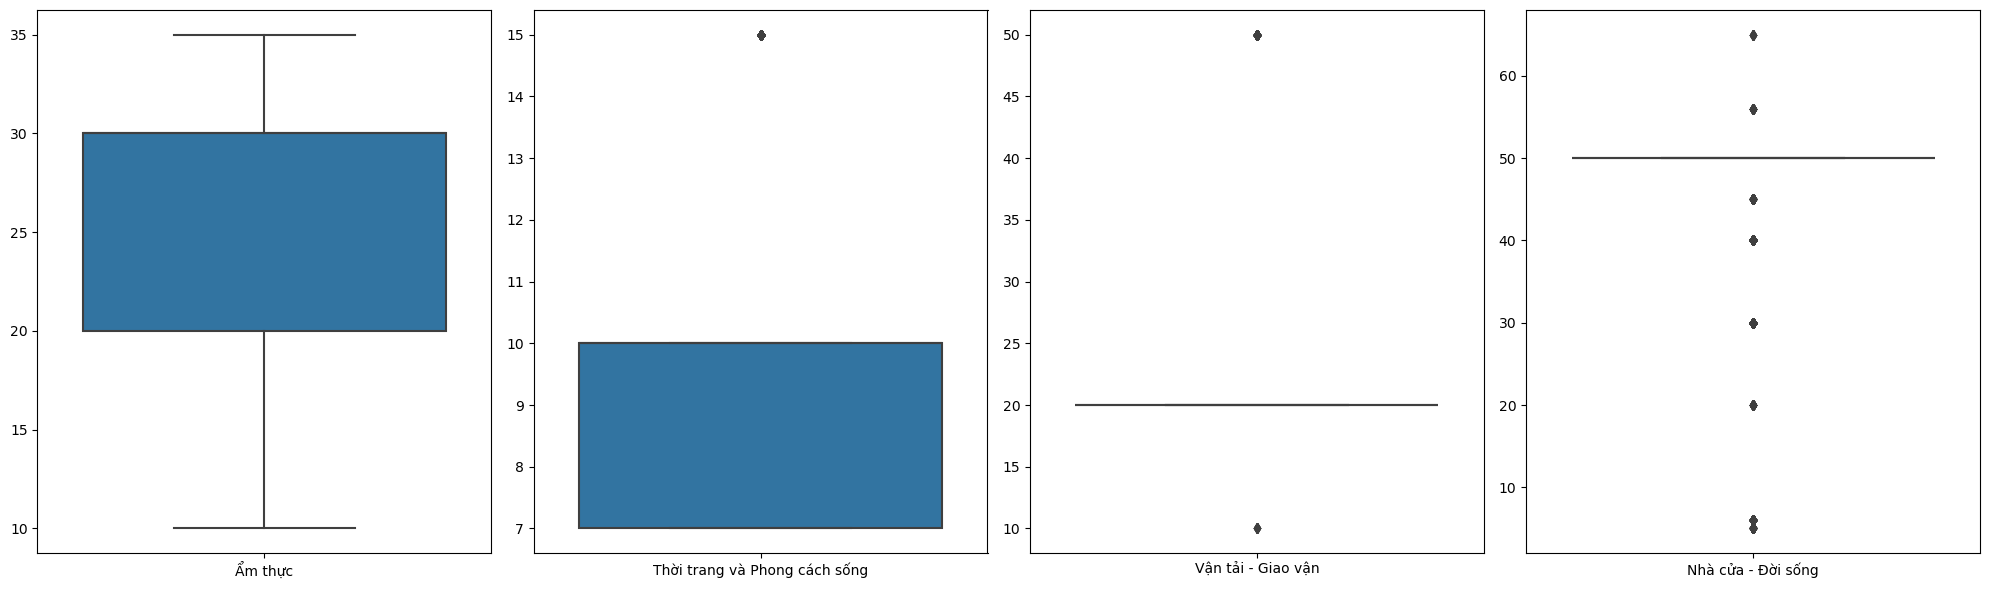

In [95]:
# Filter out top 5 categories with data
top_categories_with_data = [cate for cate in top5_category if mapping_table[mapping_table['category'] == cate]['discount_percent'].gt(0).any()]

# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=1, ncols=len(top_categories_with_data), figsize=(5*len(top_categories_with_data), 6))

# Iterate over top categories with data
for i, cate in enumerate(top_categories_with_data):
    tmp = mapping_table[mapping_table['category'] == cate]
    
    # Filter out rows where discount_percent > 0
    tmp_filtered = tmp[tmp['discount_percent'] > 0]

    # Create a boxplot on the i-th subplot
    sns.boxplot(x='category', y='discount_percent', data=tmp_filtered, ax=axes[i])
    
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    
# Adjust layout and display the plot
plt.tight_layout()
plt.show()

**Xét theo sub_category**

<li>Phân phối của discount amount theo sub_category (trong top5 category)</li>

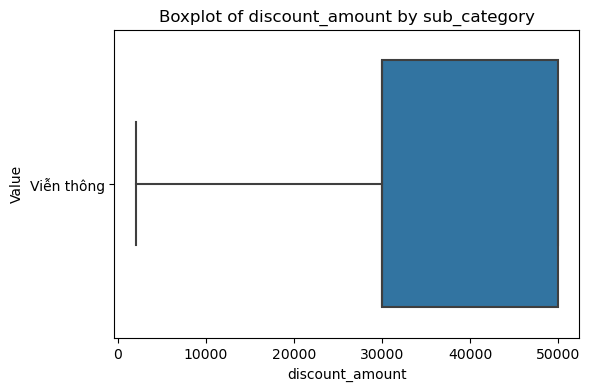

----------------------------------------------------------------------------------------------------


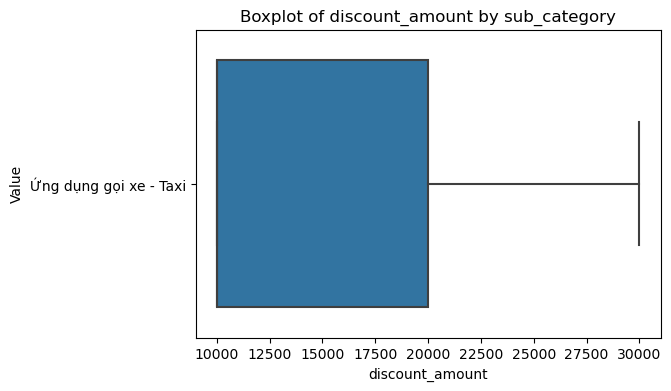

----------------------------------------------------------------------------------------------------


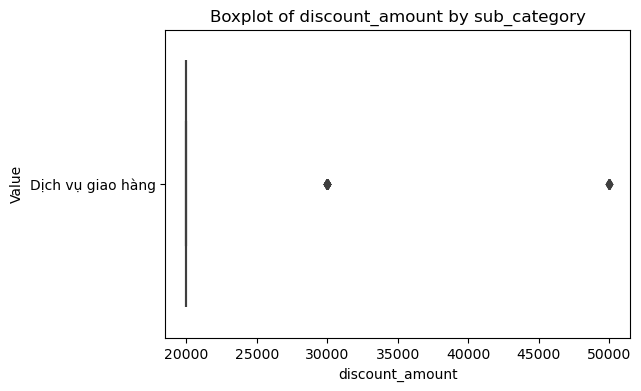

----------------------------------------------------------------------------------------------------


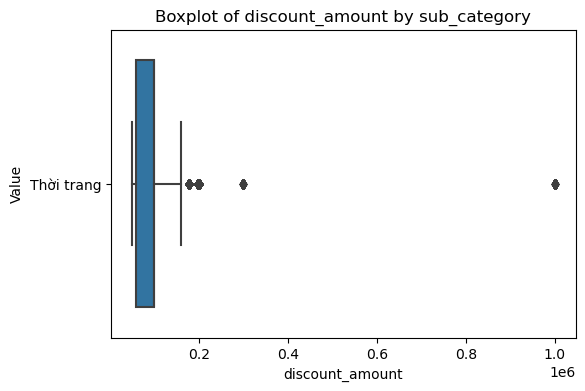

----------------------------------------------------------------------------------------------------


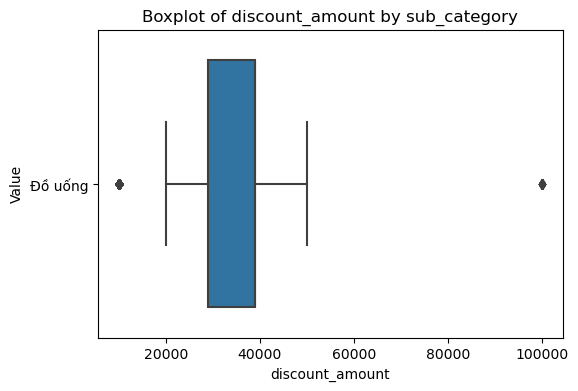

----------------------------------------------------------------------------------------------------


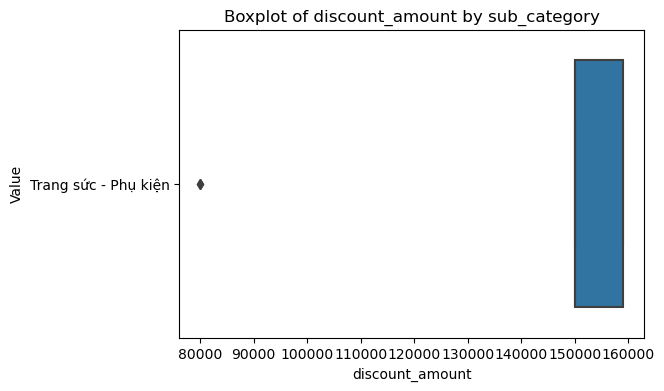

----------------------------------------------------------------------------------------------------


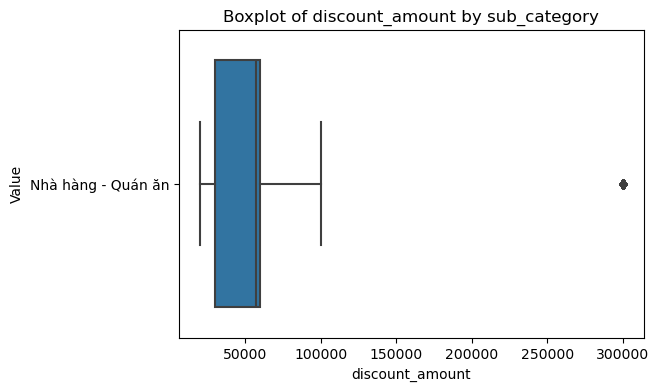

----------------------------------------------------------------------------------------------------


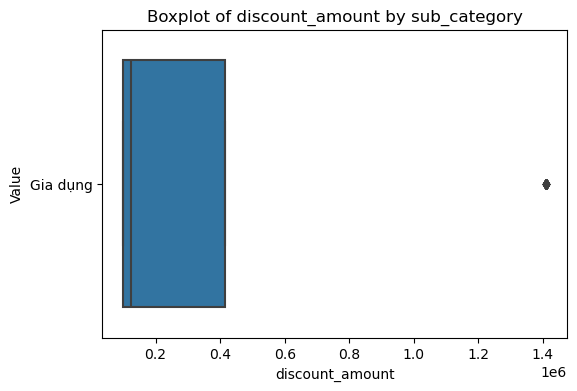

----------------------------------------------------------------------------------------------------


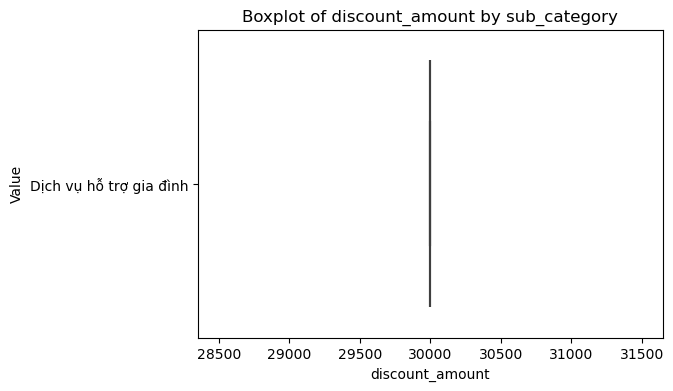

----------------------------------------------------------------------------------------------------


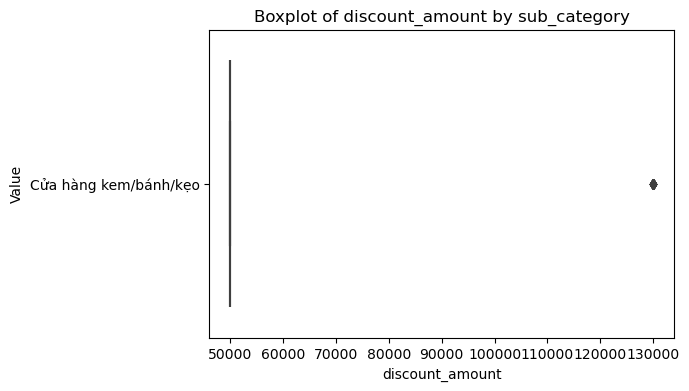

----------------------------------------------------------------------------------------------------


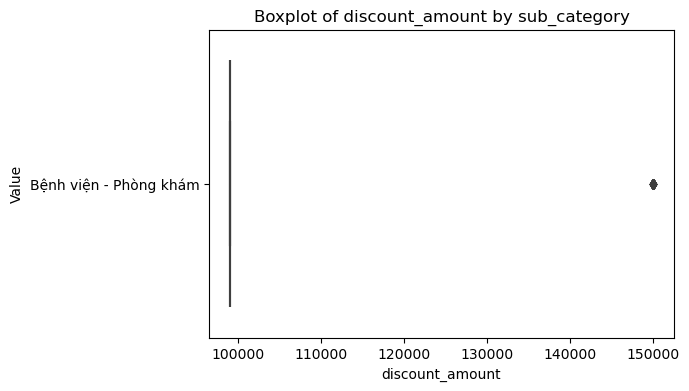

----------------------------------------------------------------------------------------------------


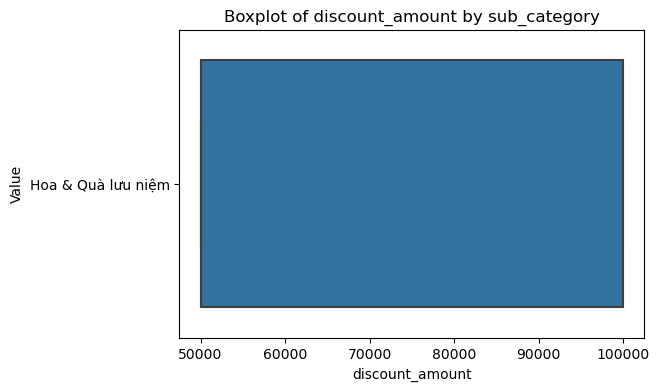

----------------------------------------------------------------------------------------------------


In [68]:
# Create a boxplot with sub_category variables
subcates = mapping_table[mapping_table['category'].isin(top5_category)]['sub_category'].unique()
for sub in subcates:
    tmp = mapping_table[mapping_table['sub_category'] == sub]
    if len(tmp[tmp['discount_amount']>0]) == 0:
        continue

    plt.figure(figsize=(6,4))
    sns.boxplot(y='sub_category', x='discount_amount', orient='h', data=tmp[tmp['discount_amount']>0])
    
    # Add labels and title
    plt.ylabel('Value')
    plt.title('Boxplot of discount_amount by sub_category')
    
    # Display the plot
    plt.show()
    print('-'*100)

<li>Phân phối của discount percent theo sub_category (trong top5 category)</li>

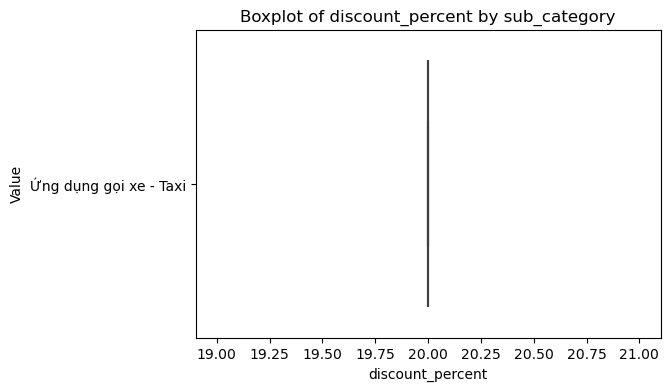

----------------------------------------------------------------------------------------------------


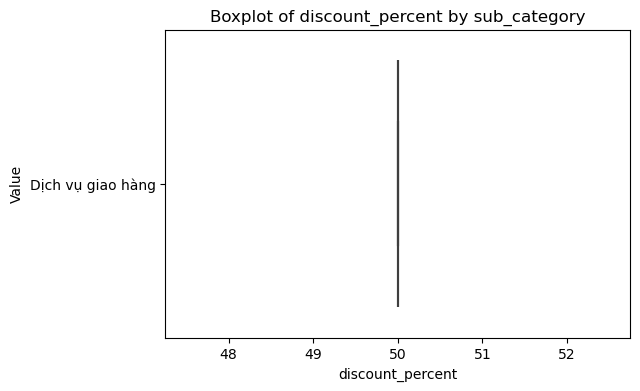

----------------------------------------------------------------------------------------------------


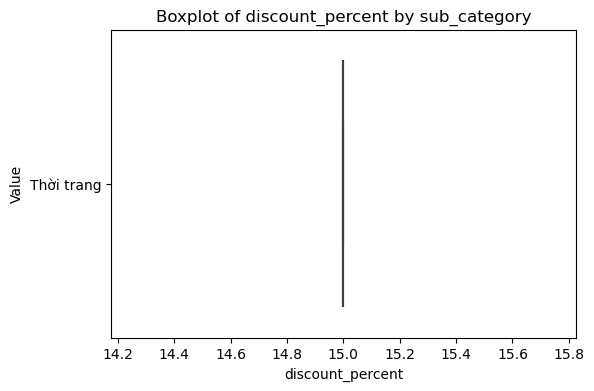

----------------------------------------------------------------------------------------------------


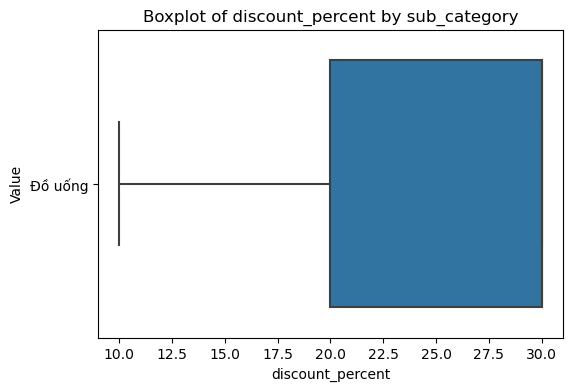

----------------------------------------------------------------------------------------------------


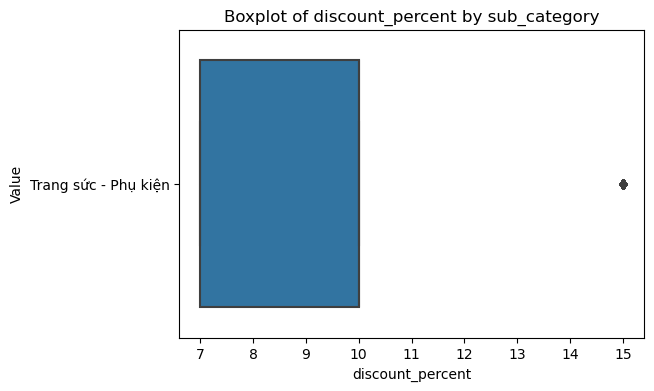

----------------------------------------------------------------------------------------------------


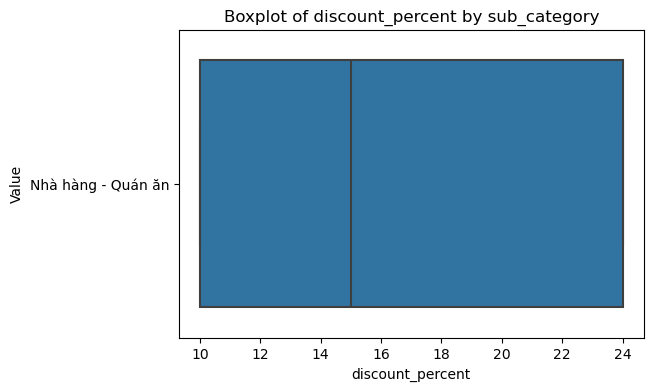

----------------------------------------------------------------------------------------------------


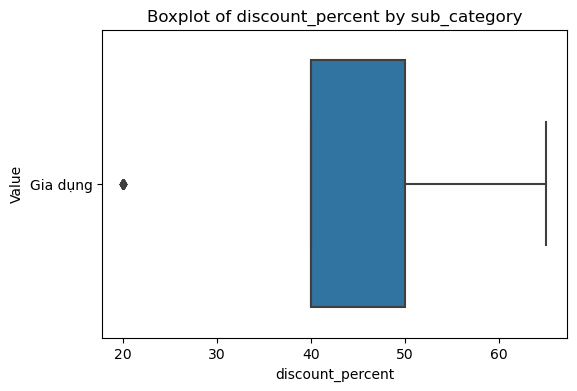

----------------------------------------------------------------------------------------------------


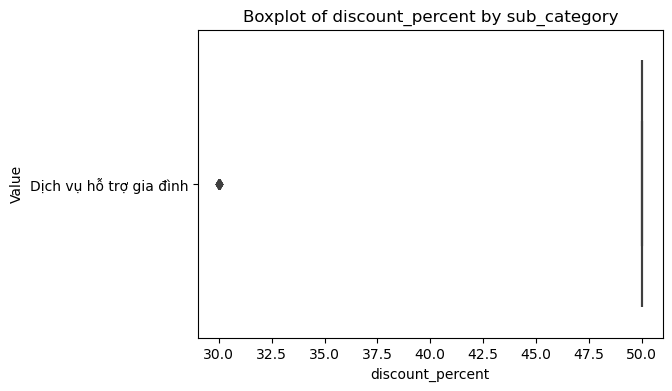

----------------------------------------------------------------------------------------------------


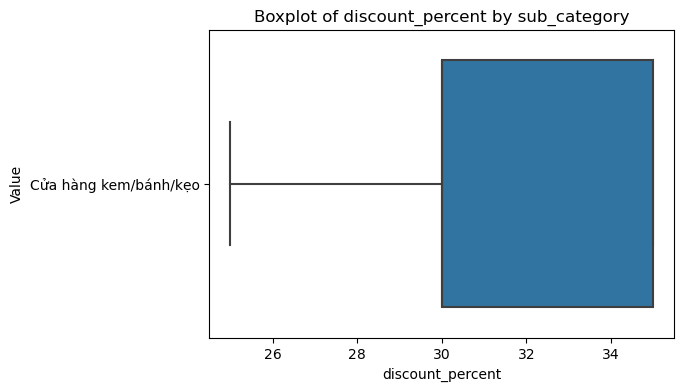

----------------------------------------------------------------------------------------------------


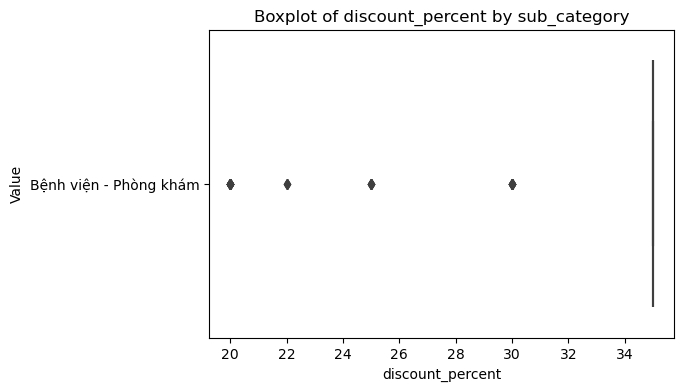

----------------------------------------------------------------------------------------------------


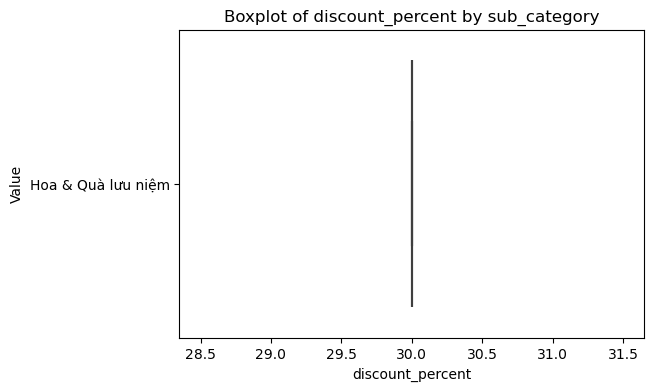

----------------------------------------------------------------------------------------------------


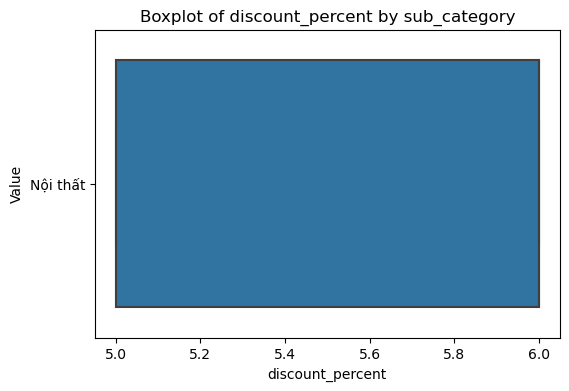

----------------------------------------------------------------------------------------------------


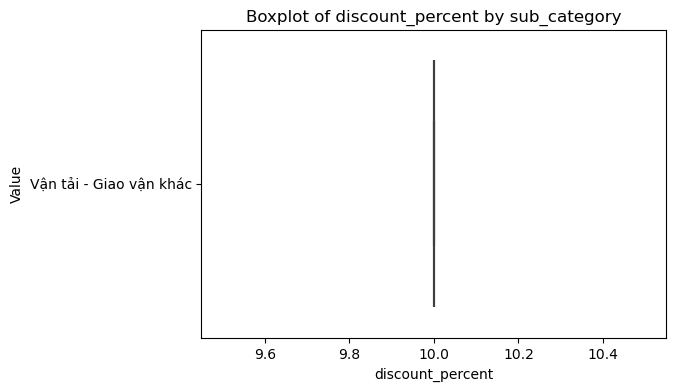

----------------------------------------------------------------------------------------------------


In [69]:
# Create a boxplot with sub_category variables
subcates = mapping_table[mapping_table['category'].isin(top5_category)]['sub_category'].unique()
for sub in subcates:
    tmp = mapping_table[mapping_table['sub_category'] == sub]
    if len(tmp[tmp['discount_percent']>0]) == 0:
        continue

    plt.figure(figsize=(6,4))
    sns.boxplot(y='sub_category', x='discount_percent', orient='h', data=tmp[tmp['discount_percent']>0])
    
    # Add labels and title
    plt.ylabel('Value')
    plt.title('Boxplot of discount_percent by sub_category')
    
    # Display the plot
    plt.show()
    print('-'*100)

### 4.2 scheme_df

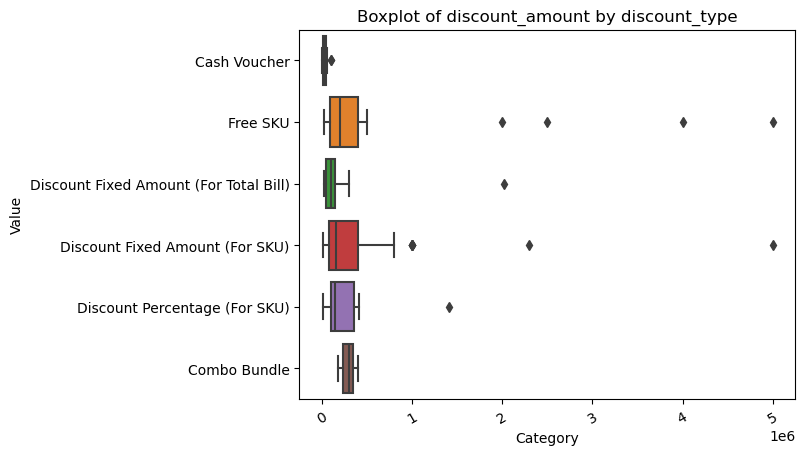

In [70]:
# Create a boxplot with categorical variables
sns.boxplot(x='discount_amount', y='discount_type', orient='h', data=scheme_df[scheme_df['discount_amount']>0])

# Add labels and title
plt.xlabel('Category')
plt.xticks(rotation=30)
plt.ylabel('Value')
plt.title('Boxplot of discount_amount by discount_type')

# Display the plot
plt.show()

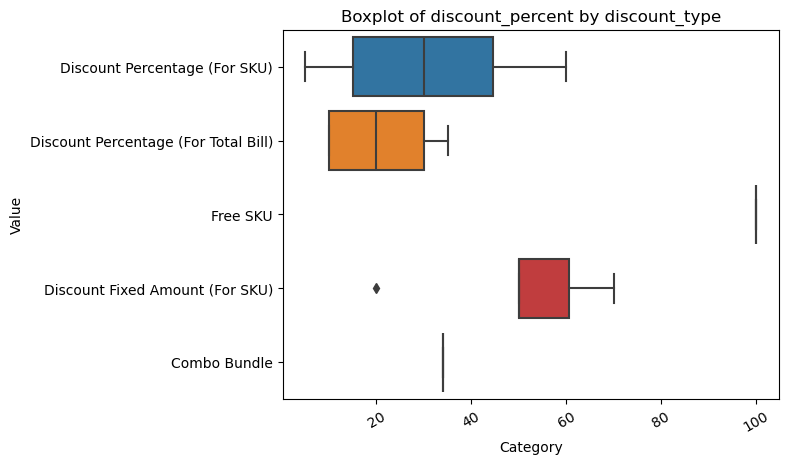

In [71]:
# Create a boxplot with categorical variables
sns.boxplot(x='discount_percent', y='discount_type', orient='h', data=scheme_df[scheme_df['discount_percent']>0])

# Add labels and title
plt.xlabel('Category')
plt.xticks(rotation=30)
plt.ylabel('Value')
plt.title('Boxplot of discount_percent by discount_type')

# Display the plot
plt.show()

### 4.3 user_df

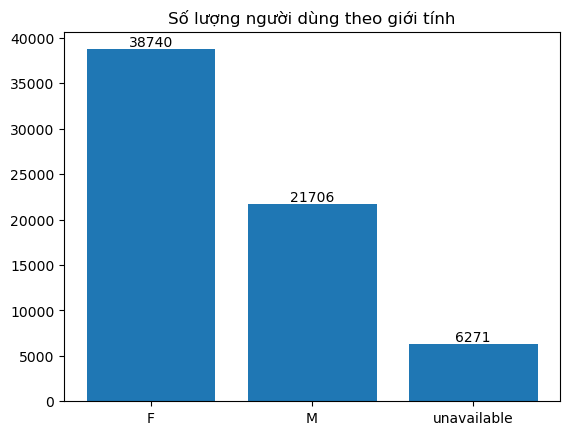

In [72]:
number_of_user_by_gender = user_df.gender.value_counts().reset_index()
plt.bar(number_of_user_by_gender['gender'], number_of_user_by_gender['count'])
# Add values on top of the bars
for i, value in enumerate(number_of_user_by_gender['count']):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')
plt.title('Số lượng người dùng theo giới tính')
plt.show()

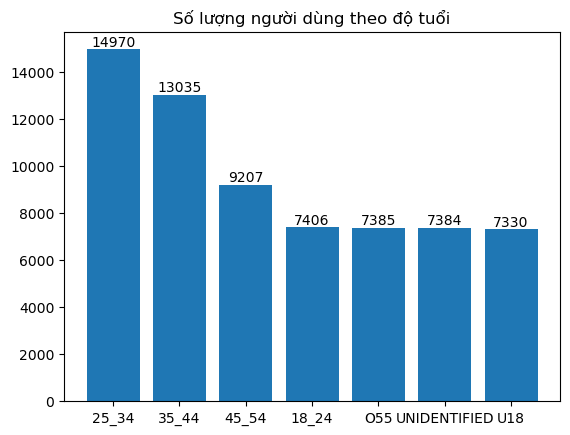

In [73]:
number_of_user_by_age = user_df.age.value_counts().reset_index()
plt.bar(number_of_user_by_age['age'], number_of_user_by_age['count'])
# Add values on top of the bars
for i, value in enumerate(number_of_user_by_age['count']):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')

plt.title('Số lượng người dùng theo độ tuổi')
plt.show()

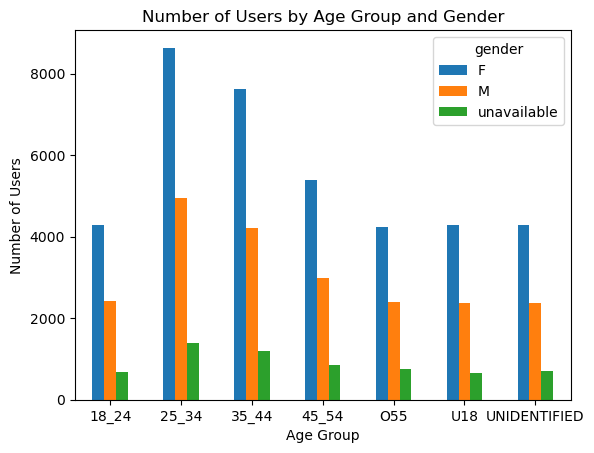

In [74]:
# Group the data by gender and age_group and count the number of users
number_of_user_by_age_gender = user_df.groupby(['age', 'gender']).size().unstack()

# Plot the bar chart
fig, ax = plt.subplots()
number_of_user_by_age_gender.plot(kind='bar', ax=ax)

# Add labels and title
plt.xlabel('Age Group')
plt.xticks(rotation=0)
plt.ylabel('Number of Users')
plt.title('Number of Users by Age Group and Gender')

# Display the plot
plt.show()